#Group : 14

Malika Lal 12220004

Snigdha Bhattacharjee 12220067

Deepak Sahu 12220074

Aadarsh Mohapatra 12220033

## Curated Zone

In [0]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


spark = SparkSession.builder \
  .appName("BDCC_Assignment__Curated") \
  .config("spark.sql.hive.metastorePartitionPruningFallbackOnException", "true") \
  .getOrCreate()

appName = spark.sparkContext.getConf().get("spark.app.name")
print(f"Spark application name: {appName}")


Spark application name: Databricks Shell


In [0]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

from pyspark.sql import SparkSession

spark = SparkSession.builder \
  .appName("Databricks Shell") \
  .config("spark.sql.hive.metastorePartitionPruningFallbackOnException", "true") \
  .getOrCreate()

In [0]:
%sql

USE staging_sales;
SHOW Tables;

database,tableName,isTemporary
staging_sales,customermaster,false
staging_sales,orders,false


#### Query 1


In [0]:
%sql
SELECT 
  Category,
  SUM(Total) AS Revenue
FROM
  staging_sales.orders
WHERE
  Converted_Month = '11/2020'
  and Status in ( 'received','complete','cod','paid','closed')

GROUP BY
  Category;



Category,Revenue
Mobiles & Tablets,1443746.497540
Men's Fashion,82484.372380
Appliances,138821.957610
Women's Fashion,173682.432870
Beauty & Grooming,84190.188960
Superstore,52802.988660
Entertainment,651610.918520
Soghaat,14688.964670
Home & Living,25468.936520
Computing,154640.769380


Assumption made here was that all these status define the completion of the order  'received','complete','cod','paid','closed' then revenue was calculated for these orders only.

In [0]:
query = """
SELECT 
  Category,
  SUM(Total) AS Revenue
FROM
  staging_sales.orders
WHERE
  Converted_Month = '11/2020'
  AND Status IN ('received', 'complete', 'cod', 'paid', 'closed')
GROUP BY
  Category
"""
result_df = spark.sql(query).toPandas()

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Revenue] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


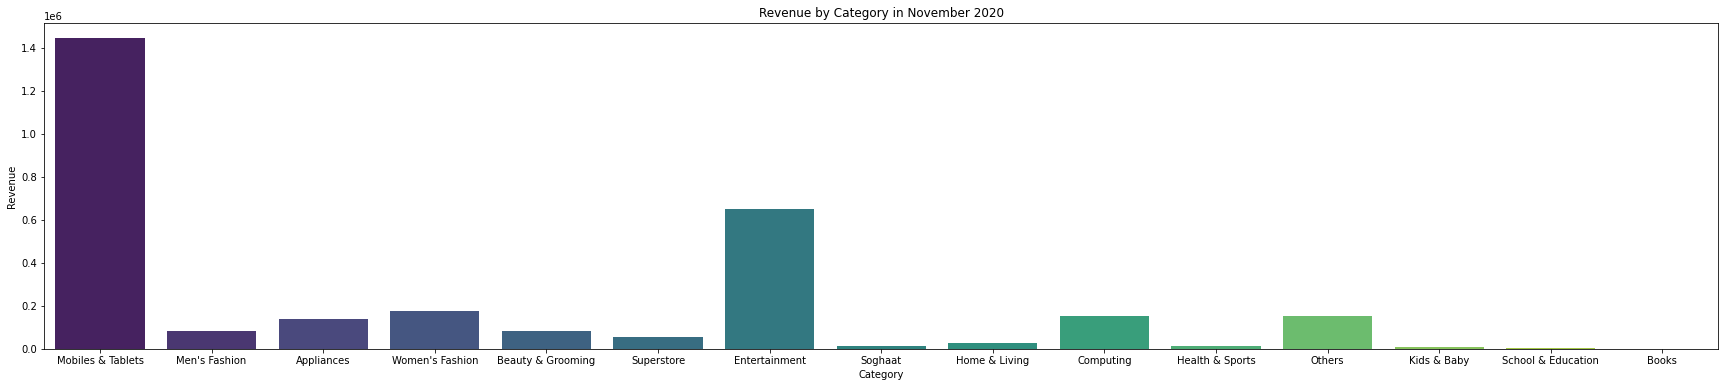

In [0]:
# Plotting using Seaborn
plt.figure(figsize=(30, 6))
sns.barplot(x="Category", y="Revenue", data=result_df, palette="viridis")
plt.title("Revenue by Category in November 2020")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

#### Query 2

In [0]:
%sql
SELECT 
  Category,
  sum(Qty_Ordered) as No_Refund_Items
FROM
  staging_sales.orders
WHERE
  year =2020
  and Status in ( 'order_refunded','refund','canceled')

GROUP BY
  Category
  Order by sum(Qty_Ordered) desc limit 5 ;


Category,No_Refund_Items
Mobiles & Tablets,27129
Men's Fashion,20671
Appliances,15816
Women's Fashion,10886
Entertainment,7719


Assumption made here was that all these statuses define the refund of the order  'order_refunded','refund','canceled' and hence the calculation was done accordingly.

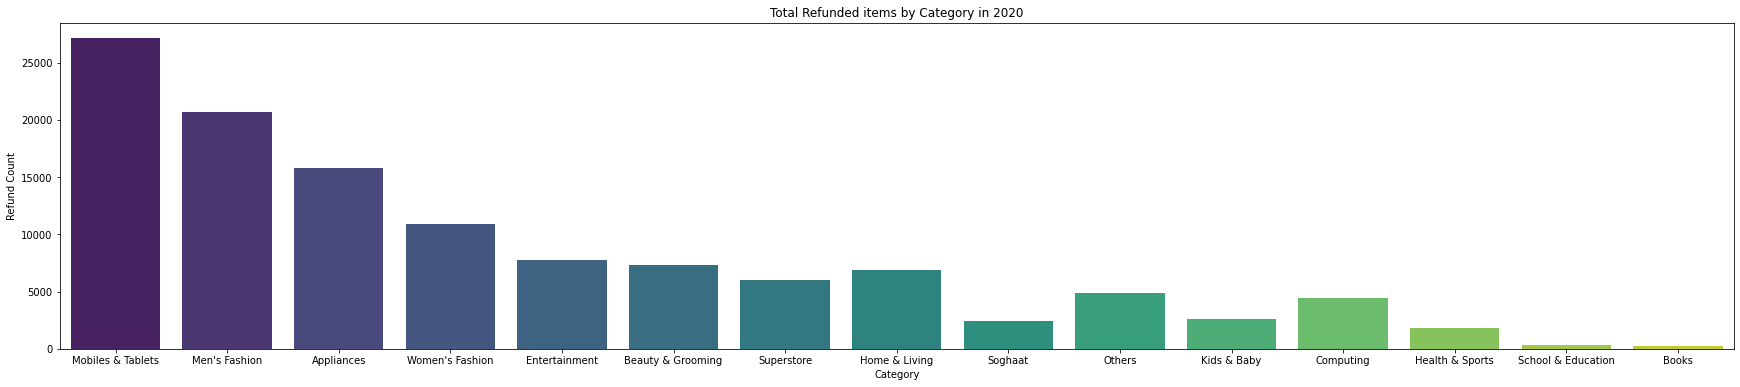

In [0]:
query = """
SELECT 
  Category,
  sum(Qty_Ordered) as No_Refund_Items
FROM
  staging_sales.orders
WHERE
  year =2020
  and Status in ( 'order_refunded','refund','canceled')

GROUP BY
  Category
   ;
"""
result_df = spark.sql(query).toPandas()
plt.figure(figsize=(30, 6))
sns.barplot(x="Category", y="No_Refund_Items", data=result_df, palette="viridis")
plt.title("Total Refunded items by Category in 2020")
plt.xlabel("Category")
plt.ylabel("Refund Count")
plt.show()


#### Query 3

In [0]:
%sql
SELECT 
  year,
  substring(Month,1,3) Month,
  Category,
  sum(Qty_Ordered) Total_Orders
FROM
  staging_sales.orders
GROUP BY
  year,
  Month,
  Category;


year,Month,Category,Total_Orders
2020,Dec,Women's Fashion,16416
2020,Dec,Appliances,31740
2021,Jan,Men's Fashion,7096
2021,Aug,Mobiles & Tablets,8020
2021,Sep,Women's Fashion,4794
2021,Jan,Appliances,4176
2021,Jul,Men's Fashion,5844
2021,Aug,Men's Fashion,3118
2021,Jul,Mobiles & Tablets,8063
2021,Apr,Appliances,8326


In [0]:
query = """
SELECT 
  Category,
  sum(Qty_Ordered) Total_Orders
FROM
  staging_sales.orders
GROUP BY
  Category
"""

# Execute the query and convert the result to a Pandas DataFrame
result_df = spark.sql(query).toPandas()

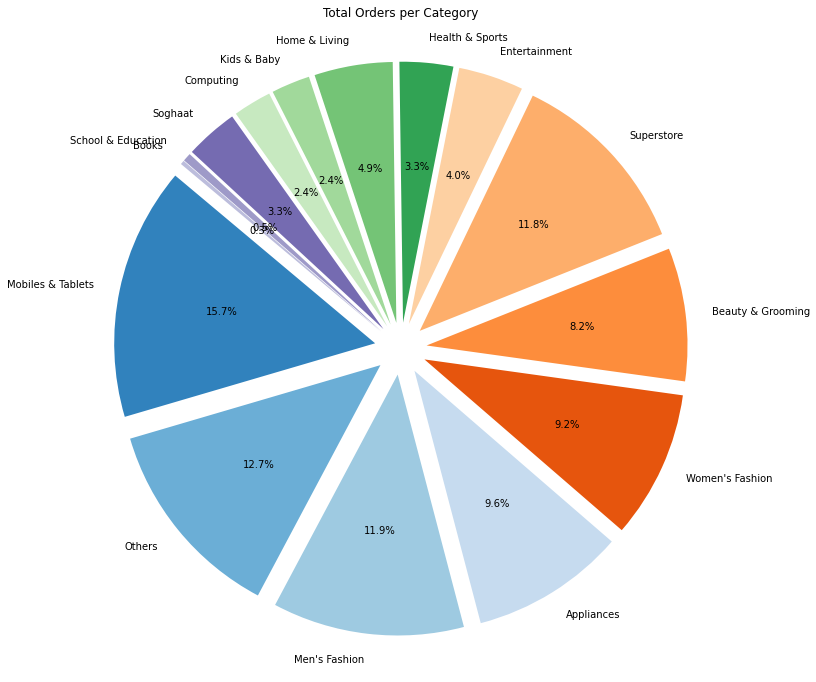

In [0]:
# Plotting using a pie chart
plt.figure(figsize=(30, 12))
colors = plt.cm.tab20c.colors

# Automatically generate explode list
explode = [0.1] * len(result_df['Category'])

plt.pie(result_df['Total_Orders'], labels=result_df['Category'], autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
plt.title("Total Orders per Category")
plt.show()


#### Query 4

In [0]:
from pyspark.sql import functions as F

Customer = spark.table("staging_sales.customermaster")

# Categorize customers by age group
customer_age_group = F.when(F.col("age") <= 20, "Young") \
                      .when((F.col("age") > 20) & (F.col("age") <= 35), "Adults") \
                      .when((F.col("age") > 35) & (F.col("age") <= 55), "Middle-Age") \
                      .otherwise("Old")

# Adding age group column to the Customer DataFrame
Customer = Customer.withColumn("Age_Group", customer_age_group)

Orders = spark.table("staging_sales.orders")

# Join Orders and Customer DataFrames
Orders_with_Customer = Orders.join(Customer, Orders.Cust_Id == Customer.cust_id)

# Calculate total spend by category and age group
category_age_spend = Orders_with_Customer.groupBy("Category", "Age_Group") \
                                         .agg(F.sum("Total").alias("Total_Spend"))

# Calculate total spend by category
total_spend_per_category = category_age_spend.groupBy("Category") \
                                             .agg(F.sum("Total_Spend").alias("Category_Total_Spend"))

# Join to get the category total spend
category_age_spend = category_age_spend.join(total_spend_per_category, "Category")

# Calculate the percentage of total spend
category_age_spend = category_age_spend.withColumn("Percentage_of_Total_Spend", 
                                                   (F.col("Total_Spend") / F.col("Category_Total_Spend")) * 100)


result_table = category_age_spend.groupBy("Category") \
                                 .pivot("Age_Group") \
                                 .agg(F.first("Percentage_of_Total_Spend"))

result_table.show()

+------------------+---------+----------+---------+---------+
|          Category|   Adults|Middle-Age|      Old|    Young|
+------------------+---------+----------+---------+---------+
|School & Education|41.113975| 27.040528|26.681961| 5.163536|
|     Entertainment|26.493530| 35.937447|33.327143| 4.241880|
|       Kids & Baby|25.911142| 31.440197|35.417073| 7.231588|
|         Computing|26.101790| 39.471821|30.236014| 4.190375|
| Mobiles & Tablets|25.001586| 36.288251|33.798748| 4.911415|
| Beauty & Grooming|28.443938| 31.289424|35.017107| 5.249531|
|   Health & Sports|20.361519| 39.241772|37.170926| 3.225784|
|           Soghaat|21.674923| 31.978222|35.035975|11.310881|
|             Books|22.223952| 33.056855|38.630403| 6.088790|
|            Others|26.277166| 31.397586|38.163578| 4.161671|
|        Superstore|23.397387| 37.059247|35.541559| 4.001807|
|     Men's Fashion|25.253316| 35.239869|33.253742| 6.253073|
|        Appliances|27.883269| 34.702821|32.960230| 4.453681|
|   Wome

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Adults, Middle-Age, Old, Young] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


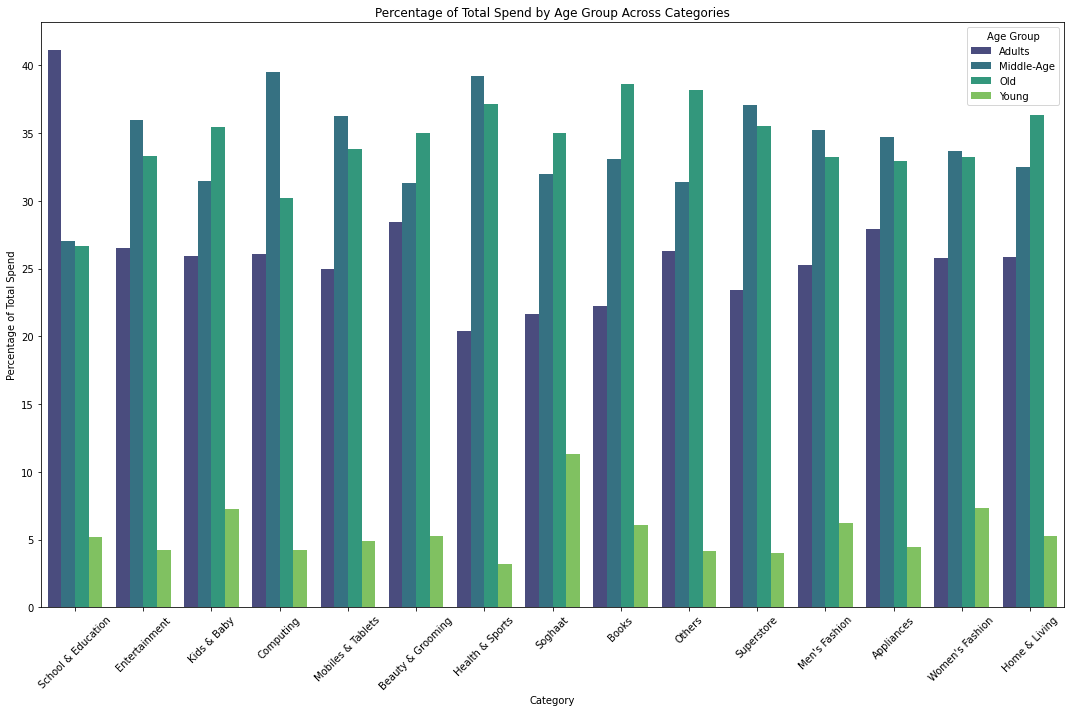

In [0]:
result_pd = result_table.toPandas()

melted_df = result_pd.melt(id_vars=["Category"], var_name="Age_Group", value_name="Percentage")

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Category', y='Percentage', hue='Age_Group', data=melted_df, palette="viridis")

plt.title('Percentage of Total Spend by Age Group Across Categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Percentage of Total Spend')
plt.legend(title='Age Group')

plt.tight_layout()
plt.show()


#### Query 5

In [0]:
from pyspark.sql import functions as F

Customer = spark.table("staging_sales.customermaster")
Orders = spark.table("staging_sales.orders")

# Join Orders and Customer DataFrames
Orders_with_Customer = Orders.join(Customer, Orders.Cust_Id == Customer.cust_id)

# Calculate total spend by category and gender
category_gender_spend = Orders_with_Customer.groupBy("Category", "Gender") \
                                            .agg(F.sum("Total").alias("Total_Spend"))

# Calculate total spend by category
total_spend_per_category = category_gender_spend.groupBy("Category") \
                                                .agg(F.sum("Total_Spend").alias("Category_Total_Spend"))

# Join to get the category total spend
category_gender_spend = category_gender_spend.join(total_spend_per_category, "Category")

# Calculate the percentage of total spend
category_gender_spend = category_gender_spend.withColumn("Percentage_of_Total_Spend", 
                                                         (F.col("Total_Spend") / F.col("Category_Total_Spend")) * 100)

# Pivot table to get desired format
result_table = category_gender_spend.groupBy("Category") \
                                    .pivot("Gender") \
                                    .agg(F.first("Percentage_of_Total_Spend"))

result_table.show()

+------------------+---------+---------+
|          Category|        F|        M|
+------------------+---------+---------+
|School & Education|44.451843|55.548157|
|     Entertainment|49.543062|50.456938|
|       Kids & Baby|49.551544|50.448456|
|         Computing|45.990414|54.009586|
| Mobiles & Tablets|50.930631|49.069369|
| Beauty & Grooming|48.130520|51.869480|
|   Health & Sports|40.811912|59.188088|
|           Soghaat|49.011085|50.988915|
|             Books|40.209654|59.790346|
|            Others|47.381344|52.618656|
|        Superstore|47.248312|52.751688|
|     Men's Fashion|47.247743|52.752257|
|        Appliances|49.982192|50.017808|
|   Women's Fashion|47.231447|52.768553|
|     Home & Living|54.839394|45.160606|
+------------------+---------+---------+



/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [F, M] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


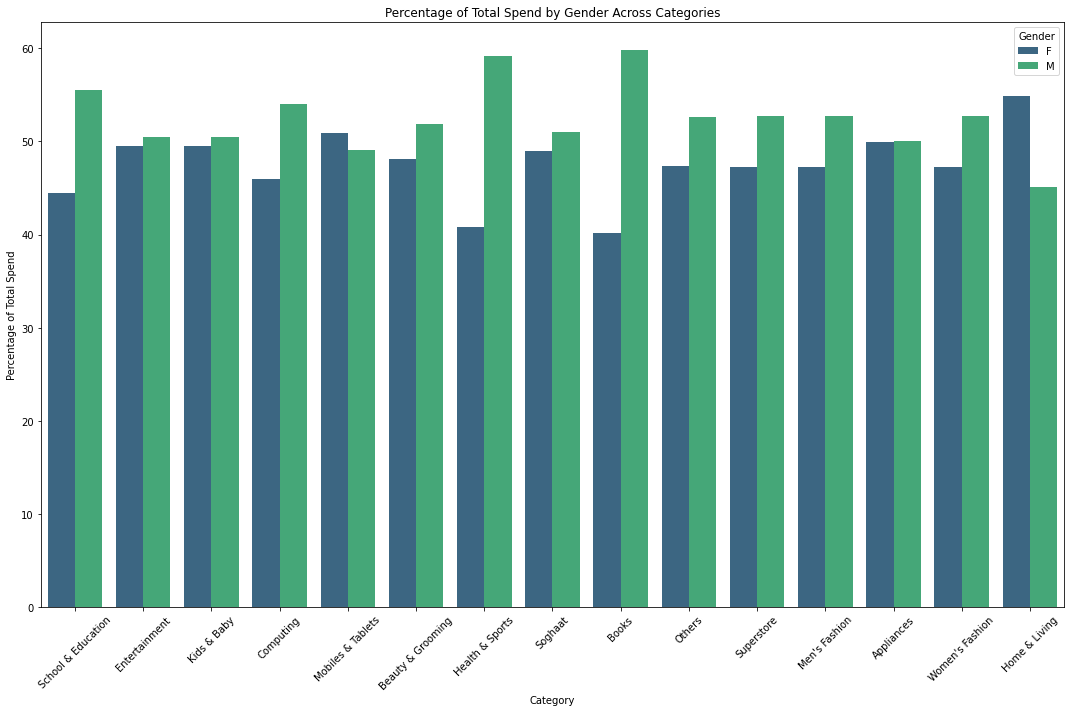

In [0]:
# Convert the Spark DataFrame to a Pandas DataFrame
result_pd = result_table.toPandas()

melted_df = result_pd.melt(id_vars=["Category"], var_name="Gender", value_name="Percentage")

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Category', y='Percentage', hue='Gender', data=melted_df, palette="viridis")

plt.title('Percentage of Total Spend by Gender Across Categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Percentage of Total Spend')
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()



#### Query 6

In [0]:
import pyspark.sql.functions as F
from pyspark.sql.window import Window

orders_df = spark.table("staging_sales.orders")
customermaster_df = spark.table("staging_sales.customermaster")

# Alias the DataFrames to avoid column ambiguity
orders_df = orders_df.alias("orders")
customermaster_df = customermaster_df.alias("customermaster")

Orders_with_Customer = orders_df.join(customermaster_df, orders_df["orders.cust_id"] == customermaster_df["customermaster.cust_id"])

# Calculate total spend for each customer within each month
monthly_spend = Orders_with_Customer.groupBy(F.year(F.to_date("orders.order_date", "yyyy-MM-dd")).alias("year"), 
                                             F.month(F.to_date("orders.order_date", "yyyy-MM-dd")).alias("month"), 
                                             "orders.cust_id") \
                                    .agg(F.sum("orders.total").alias("total_spend"))

# Rank customers by total spend within each month, descending
ranked_customers = monthly_spend.withColumn("rank", F.rank().over(Window.partitionBy("year", "month").orderBy(F.desc("total_spend"))))

# Combine firstname and Lastname to create full_name
combined_df = customermaster_df.withColumn("full_name", F.concat_ws(" ", "customermaster.firstname", "customermaster.Lastname"))

# Filter for the top 5 customers in each month
top_customers = ranked_customers.filter("rank <= 5") \
                                .join(combined_df.select("customermaster.cust_id", "full_name", "customermaster.County", "customermaster.Gender"), 
                                      on="cust_id", 
                                      how="left")

# Select the required columns and display the results
top_customers.select("year", "month", "cust_id", "full_name", "County", "Gender", "total_spend", "rank") \
             .show()


+----+-----+-------+------------------+--------------------+------+-------------+----+
|year|month|cust_id|         full_name|              County|Gender|  total_spend|rank|
+----+-----+-------+------------------+--------------------+------+-------------+----+
|2020|   10|  61038|Brazeal  Cornelius|              Harlan|     M|452826.300000|   1|
|2020|   10|  60767|   Westley  Rupert|             Norfolk|     M|136400.000000|   2|
|2020|   10|  61466|     Garza  Steven|           Alleghany|     F|126691.100000|   3|
|2020|   10|  61039|       Futral  Lou|District of Columbia|     M|111332.700000|   4|
|2020|   10|  60503|    Herrin  Fidela|              Nemaha|     F| 63892.480000|   5|
|2020|   11|  61466|     Garza  Steven|           Alleghany|     F|242302.600000|   1|
|2020|   11|  62524|    Lamotte  Kyung|     Staunton (city)|     F| 77072.800000|   2|
|2020|   11|  63622|    Wehr  Anjelica|            Somerset|     F| 68682.500000|   3|
|2020|   11|  56157|      Geraci  Theo|    

In [0]:
# Combine firstname and Lastname to create full_name in customermaster_df
combined_customermaster_df = customermaster_df.withColumn("full_name", F.concat_ws(" ", "customermaster.firstname", "customermaster.Lastname"))

# Filter for the top 5 customers in each month
top_customers = ranked_customers.filter("rank <= 5") \
                                .join(combined_customermaster_df.select("customermaster.cust_id", "full_name", "customermaster.County", "customermaster.Gender"), 
                                      on="cust_id", 
                                      how="left")

# Select the required columns
top_customers = top_customers.select("year", "month", "cust_id", "full_name", "County", "Gender", "total_spend", "rank")

# Convert the Spark DataFrame to a Pandas DataFrame for visualization
top_customers_pd = top_customers.toPandas()

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [total_spend] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


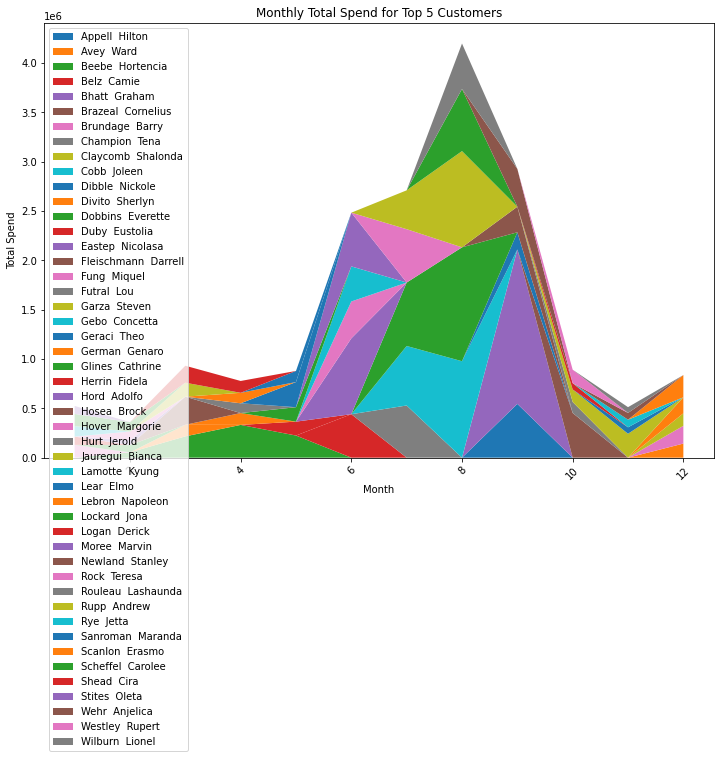

In [0]:
# Pivot the DataFrame to get months as the index and each customer's spend as separate columns
pivot_df = top_customers_pd.pivot_table(index='month', columns='full_name', values='total_spend', fill_value=0)

# Create a stacked area plot
plt.figure(figsize=(12, 8))
plt.stackplot(pivot_df.index, pivot_df.T, labels=pivot_df.columns)
plt.title('Monthly Total Spend for Top 5 Customers')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

#### Query 7

In [0]:
from pyspark.sql import functions as F
from datetime import datetime

# Define the reference date for recency calculation
reference_date = datetime(2021, 10, 31)

# Calculate Recency
recency = Orders.groupBy("Cust_Id") \
                .agg(F.max("Order_Date").alias("Last_Purchase_Date")) \
                .withColumn("Recency", 
                            F.round(F.datediff(F.lit(reference_date), "Last_Purchase_Date") / 7, 0))

# Calculate Frequency
frequency = Orders.groupBy("Cust_Id") \
                  .agg(F.countDistinct("Order_Id").alias("Frequency"))

# Calculate Monetary Value
monetary = Orders.groupBy("Cust_Id") \
                 .agg(F.sum("Total").alias("Monetary_Value"))

# Join the recency, frequency, and monetary dataframes
rfm_table = recency.join(frequency, "Cust_Id") \
                   .join(monetary, "Cust_Id")

# Show the result
rfm_table.show()


+-------+------------------+-------+---------+--------------+
|Cust_Id|Last_Purchase_Date|Recency|Frequency|Monetary_Value|
+-------+------------------+-------+---------+--------------+
|      4|        2021-09-29|    5.0|       29|  27394.190000|
|     15|        2021-02-11|   37.0|        3|    216.800000|
|     16|        2020-11-12|   50.0|        3|  11868.899000|
|     20|        2021-09-29|    5.0|       11|  28719.018000|
|     21|        2021-02-03|   39.0|        1|    105.000000|
|     23|        2021-08-07|   12.0|        5|    871.140000|
|     28|        2021-05-21|   23.0|        4|   3971.300000|
|     32|        2021-09-18|    6.0|      189| 114272.940000|
|     33|        2021-08-21|   10.0|       80|  61874.575000|
|     41|        2020-11-18|   50.0|        1|    219.900000|
|     44|        2021-07-08|   16.0|        9|  10711.079000|
|     47|        2021-07-26|   14.0|       23|  18548.330000|
|     54|        2021-08-14|   11.0|       43|  27999.600000|
|     56

In [0]:
rfm_pd = rfm_table.toPandas()

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Monetary_Value] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


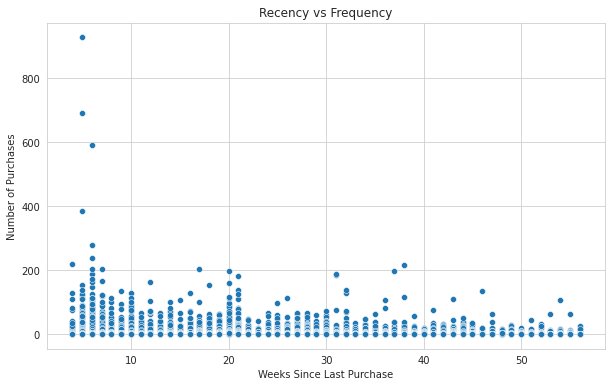

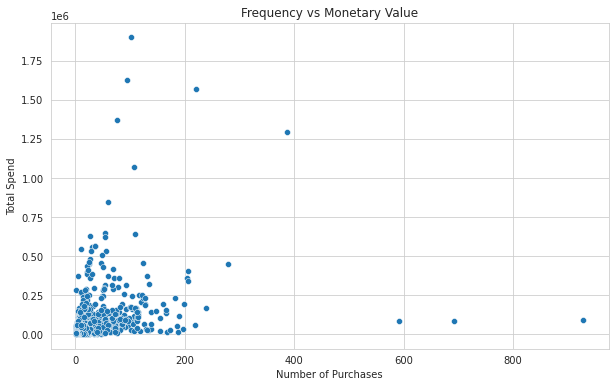

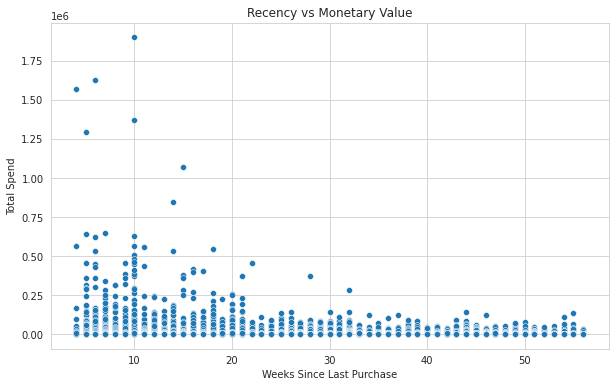

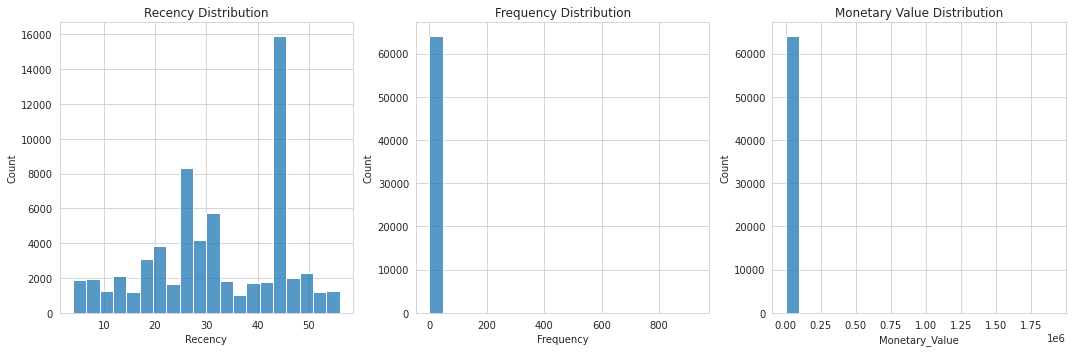

In [0]:
sns.set_style("whitegrid")

# Scatter plot for Recency and Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_pd, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Weeks Since Last Purchase')
plt.ylabel('Number of Purchases')
plt.show()

# Scatter plot for Frequency and Monetary Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_pd, x='Frequency', y='Monetary_Value')
plt.title('Frequency vs Monetary Value')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend')
plt.show()

# Scatter plot for Recency and Monetary Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_pd, x='Recency', y='Monetary_Value')
plt.title('Recency vs Monetary Value')
plt.xlabel('Weeks Since Last Purchase')
plt.ylabel('Total Spend')
plt.show()

# Histograms for each RFM component
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_pd['Recency'], bins=20, kde=False)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_pd['Frequency'], bins=20, kde=False)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_pd['Monetary_Value'], bins=20, kde=False)
plt.title('Monetary Value Distribution')

plt.tight_layout()
plt.show()


#### Query 8

In [0]:
# Join the frequency and monetary dataframes
top_customers = frequency.join(monetary, "Cust_Id")

# Sort by frequency and then by monetary value
top_customers_sorted = top_customers.orderBy(F.col("Frequency").desc(), F.col("Monetary_Value").desc())

# Get the top 10 customers
top_10_customers = top_customers_sorted.limit(10)

# Show the result
top_10_customers.show()

+-------+---------+--------------+
|Cust_Id|Frequency|Monetary_Value|
+-------+---------+--------------+
|  85775|      928|  91441.200000|
|  87724|      692|  86216.860000|
|  96927|      591|  85166.960000|
|  39707|      386|1295994.580000|
|  83736|      279| 450104.790000|
|    800|      239| 165276.745000|
| 113694|      220|1568177.600000|
|  61569|      218|  57280.400000|
|  59331|      205| 406688.800000|
|  83364|      205| 341215.504000|
+-------+---------+--------------+



/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Monetary_Value] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


<Figure size 864x576 with 0 Axes>

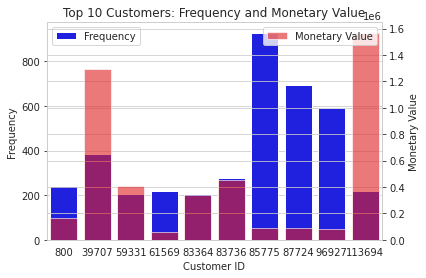

In [0]:
top_10_customers_pd = top_10_customers.toPandas()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create two subplots for frequency and monetary value
fig, ax1 = plt.subplots()

# Plotting the frequency data
sns.barplot(x='Cust_Id', y='Frequency', data=top_10_customers_pd, ax=ax1, color='b', label='Frequency')

# Creating a second y-axis for the monetary value data
ax2 = ax1.twinx()
sns.barplot(x='Cust_Id', y='Monetary_Value', data=top_10_customers_pd, ax=ax2, color='r', alpha=0.6, label='Monetary Value')

# Setting the title and labels
ax1.set_title('Top 10 Customers: Frequency and Monetary Value')
ax1.set_xlabel('Customer ID')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Monetary Value')

# Adding a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


#### Query 9 : Additional Insights

##### Customer Lifetime Value (CLV) Analysis- Not Done 


CLV- Customer Life Value

Query- How does the Customer Lifetime Value (CLV) vary among the top 100 customers, and what implications does this have for the company's marketing and customer relationship strategies?

In [0]:
# Join the monetary DataFrame with the frequency DataFrame
aov_df = monetary.join(frequency, "Cust_Id")

# Calculate Average Order Value (AOV)
aov_df = aov_df.withColumn('AOV', F.col('Monetary_Value') / F.col('Frequency'))

# Assuming an average customer lifespan of 5 years
customer_lifespan = 5

# Calculate Customer Lifetime Value (CLV)
clv = aov_df.withColumn('CLV', (F.col('AOV') * F.col('Frequency')) * customer_lifespan)

# Select relevant columns to display
clv.select('Cust_Id', 'CLV').show()

+-------+-------------+
|Cust_Id|          CLV|
+-------+-------------+
|  91141|  3000.000000|
|  93319| 12000.000000|
|  94950| 10000.000000|
|  95080|   900.000000|
|    463| 57500.000000|
|  95476|210000.000000|
|  95715| 60000.000000|
|  95994| 12000.000000|
|  96044| 24000.000000|
|  96224|  1000.000000|
|  96469|  8000.000000|
|  96853|  9000.000000|
|  97413|  5638.800000|
|  98143| 12500.000000|
|  99168| 11500.000000|
|  99239|  6000.000000|
|  99454|  1000.000000|
|  99621|  3000.000000|
|  99786|  1250.000000|
|  99817|  4250.000000|
+-------+-------------+
only showing top 20 rows



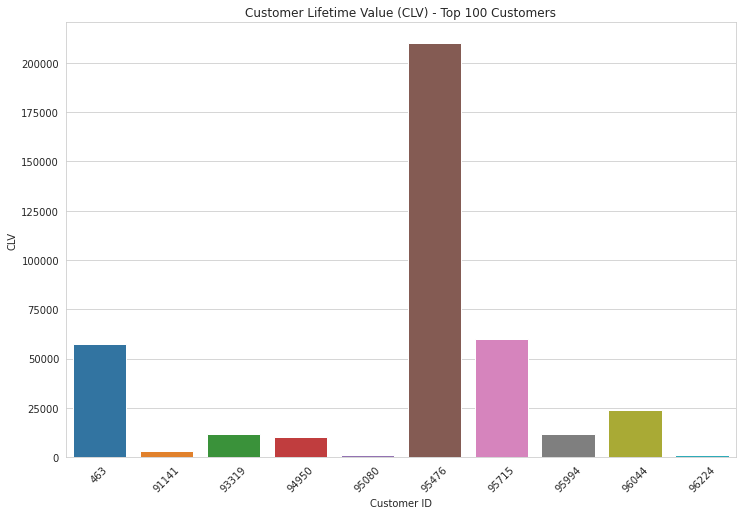

In [0]:
from pyspark.sql.types import FloatType

# Convert DecimalType columns to FloatType for efficiency
clv = clv.withColumn('Monetary_Value', F.col('Monetary_Value').cast(FloatType())) \
         .withColumn('AOV', F.col('AOV').cast(FloatType())) \
         .withColumn('CLV', F.col('CLV').cast(FloatType()))

# Adjust the limit value as needed
limit_number = 10
limited_clv = clv.limit(limit_number)

# Convert the limited Spark DataFrame to a Pandas DataFrame
limited_clv_pd = limited_clv.toPandas()

# Sort the DataFrame based on CLV for better visualization
limited_clv_pd = limited_clv_pd.sort_values(by='CLV', ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar chart for Customer Lifetime Value
sns.barplot(x='Cust_Id', y='CLV', data=limited_clv_pd)

# Add title and labels to the plot
plt.title('Customer Lifetime Value (CLV) - Top 100 Customers')
plt.xlabel('Customer ID')
plt.ylabel('CLV')

# Rotate the x-labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


##### Discount Impact Analysis

Discount Impact Analysis

Query - What is the impact of discounts on the average sale price per unit across different categories, and how can this information be leveraged to optimize pricing strategies?

In [0]:
from pyspark.sql import functions as F

# Load the orders data
orders_df = spark.table("staging_sales.orders")

# Aggregate data to analyze the impact of discount on sales
discount_impact_analysis = orders_df.groupBy("item_id", "category") \
                                    .agg(F.avg("discount_amount").alias("average_discount"),
                                         F.sum("qty_ordered").alias("total_quantity_sold"),
                                         F.sum("total").alias("total_sales_value"),
                                         F.sum("value").alias("total_list_price")) \
                                    .withColumn("discount_percentage", (F.col("average_discount") / F.col("total_list_price")) * 100) \
                                    .withColumn("avg_sale_price_per_unit", F.col("total_sales_value") / F.col("total_quantity_sold")) \
                                    .orderBy(F.desc("discount_percentage"))

# Display the results
discount_impact_analysis.show()


+-------+-----------------+----------------+-------------------+-----------------+----------------+-------------------+-----------------------+
|item_id|         category|average_discount|total_quantity_sold|total_sales_value|total_list_price|discount_percentage|avg_sale_price_per_unit|
+-------+-----------------+----------------+-------------------+-----------------+----------------+-------------------+-----------------------+
| 763232|  Women's Fashion| 1225.0000000000|                  8|       525.000000|     1750.000000|70.0000000000000000|    65.6250000000000000|
| 762276|       Appliances| 4900.0000000000|                  8|      2100.000000|     7000.000000|70.0000000000000000|   262.5000000000000000|
| 864686|       Superstore|  245.0000000000|                  8|       105.000000|      350.000000|70.0000000000000000|    13.1250000000000000|
| 763231|  Women's Fashion| 1225.0000000000|                  8|       525.000000|     1750.000000|70.0000000000000000|    65.6250000000

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [average_discount, total_sales_value, total_list_price, discount_percentage, avg_sale_price_per_unit] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


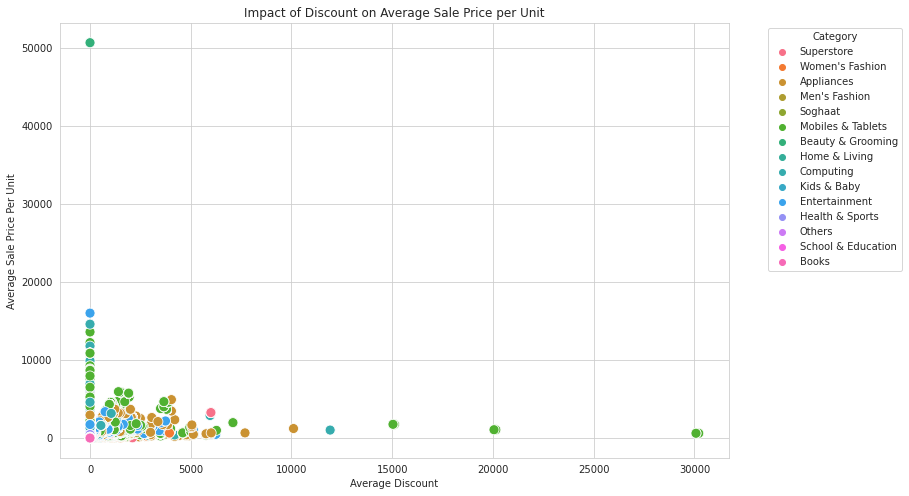

In [0]:
# Convert the Spark DataFrame to a Pandas DataFrame for visualization
discount_impact_analysis_pd = discount_impact_analysis.toPandas()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='average_discount', y='avg_sale_price_per_unit', hue='category', data=discount_impact_analysis_pd, s=100)

# Add title and labels to the plot
plt.title('Impact of Discount on Average Sale Price per Unit')
plt.xlabel('Average Discount')
plt.ylabel('Average Sale Price Per Unit')

# Adding a legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


##### Geographical Sales Analysis

In [0]:
Geographical Sales Analysis

Query: How do total sales figures distribute geographically across different states, and what strategic actions can the company take to capitalize on these insights?

In [0]:
# Assuming 'Customer' DataFrame contains 'State' or 'Region' and is joined with 'Orders'
geo_sales = Orders_with_Customer.groupBy('State').agg(F.sum('Total').alias('Total_Sales'))

# Sort by Total Sales to see which regions contribute most to sales
geo_sales.orderBy('Total_Sales', ascending=False).show()

+-----+---------------+
|State|    Total_Sales|
+-----+---------------+
|   TX|15467455.653980|
|   CA|13876177.400760|
|   NY|11365097.304790|
|   PA|10159042.311390|
|   IL| 9106894.890350|
|   FL| 8459036.770450|
|   VA| 8193937.155140|
|   OH| 8147443.019670|
|   MO| 8000869.799570|
|   KY| 6994808.600250|
|   MS| 6485482.550430|
|   NC| 6363722.534760|
|   IN| 6307448.740200|
|   IA| 6254494.319080|
|   MN| 5384619.895840|
|   WV| 5284802.350370|
|   MI| 5181664.448330|
|   GA| 5162798.873650|
|   NJ| 5130791.728960|
|   TN| 4530630.476610|
+-----+---------------+
only showing top 20 rows



In [0]:
# Aggregate Total Sales by State
geo_sales = Orders_with_Customer.groupBy("State").agg(F.sum("Total").alias("Total_Sales"))

# Convert to Pandas DataFrame for plotting
geo_sales_pd = geo_sales.toPandas()

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Total_Sales] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


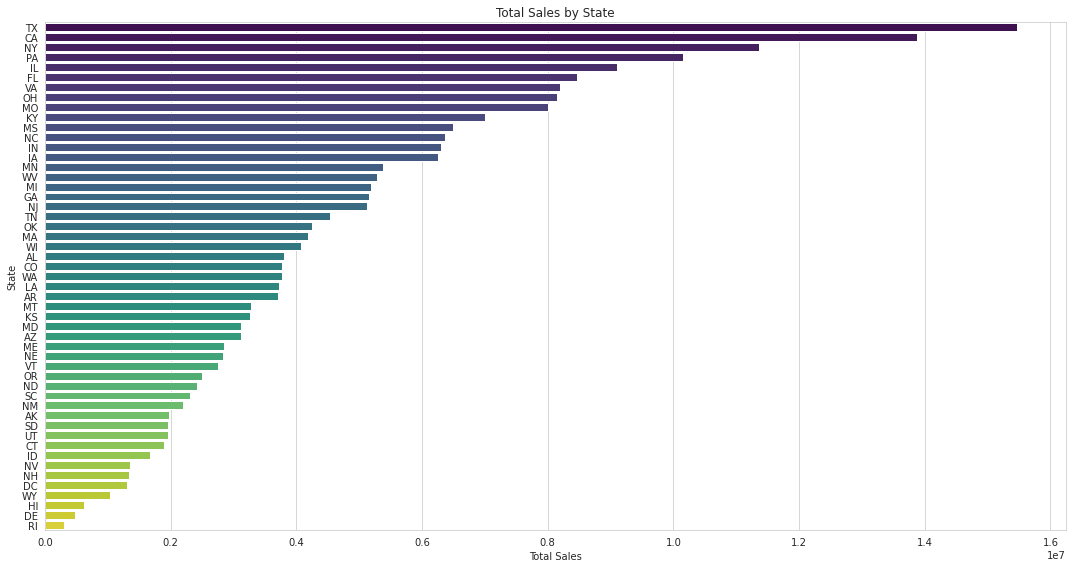

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Total_Sales', y='State', data=geo_sales_pd.sort_values('Total_Sales', ascending=False), palette='viridis')

# Enhance the plot
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')

# Show the plot
plt.tight_layout()
plt.show()